In [0]:
import torch
import torchvision
import torch.nn as nn
import  torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
from sklearn.datasets import load_digits, load_breast_cancer, load_boston, load_diabetes, load_wine, load_iris
import matplotlib.pyplot as plt



## Load the Torch dataset

In [6]:
train = datasets.MNIST(root='./cifar', train=True, transform=transforms.ToTensor(), download=True)
test = datasets.MNIST(root='./cifar', train=False, transform=transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

9920512it [00:01, 8400391.65it/s]                            


Extracting ./cifar/MNIST/raw/train-images-idx3-ubyte.gz to ./cifar/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130206.87it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./cifar/MNIST/raw/train-labels-idx1-ubyte.gz to ./cifar/MNIST/raw


1654784it [00:00, 2143924.81it/s]                            
0it [00:00, ?it/s]

Extracting ./cifar/MNIST/raw/t10k-images-idx3-ubyte.gz to ./cifar/MNIST/raw


8192it [00:00, 49759.08it/s]            


Extracting ./cifar/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./cifar/MNIST/raw
Processing...
Done!


In [7]:
print(len(train), len(test))

60000 10000


In [0]:
train_dl = DataLoader(dataset=train, batch_size=256, shuffle=True)
test_dl = DataLoader(dataset=test, batch_size=512, shuffle=True)

## Tensorboard Visualization

In [14]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

In [0]:
def matplotlib_imshow(img, one_channel=False):
    plt.figure(figsize=(20, 20))
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

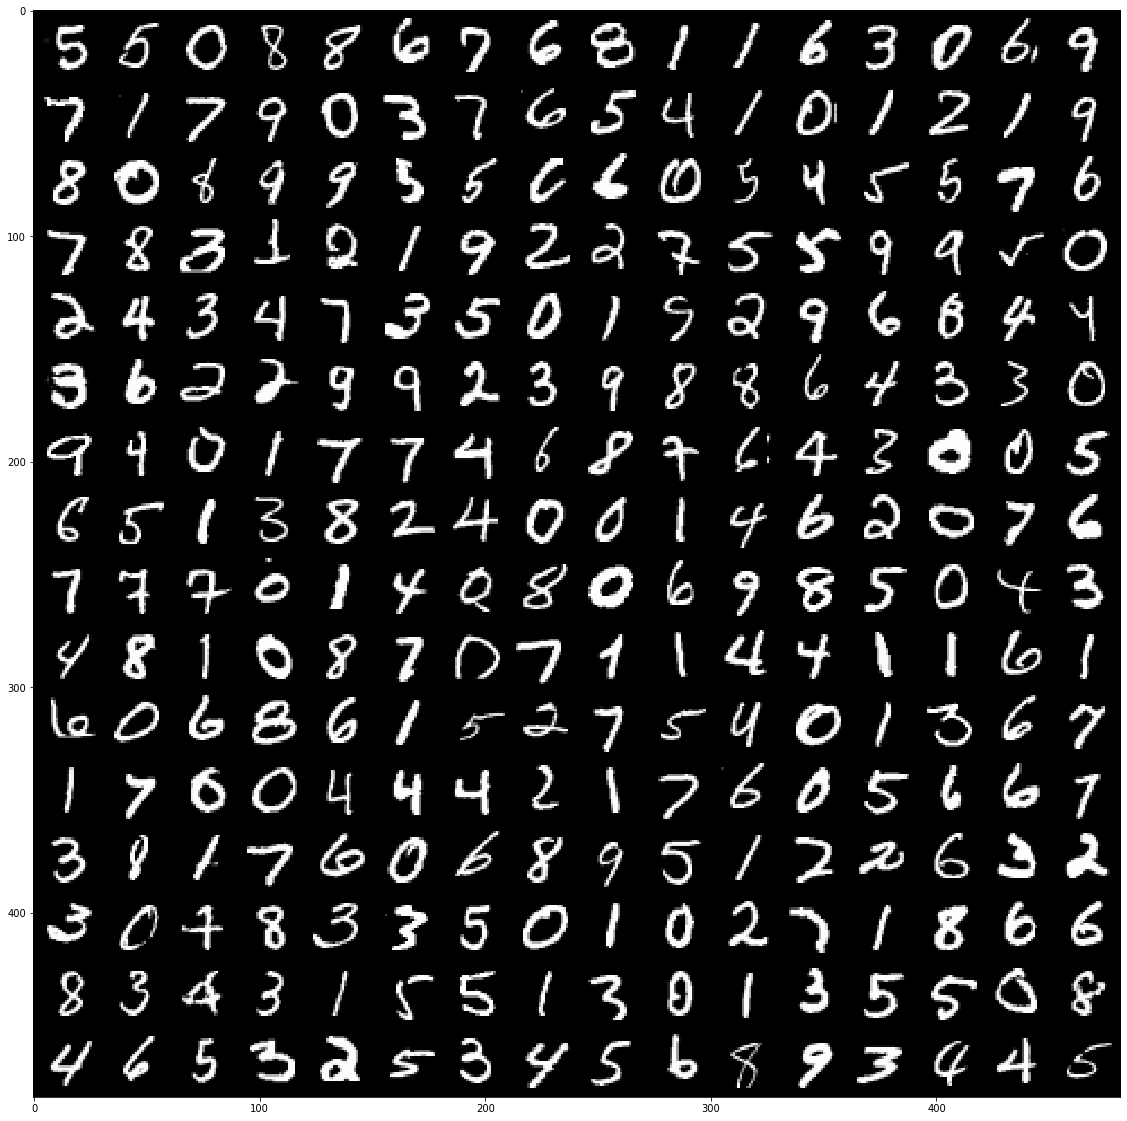

In [16]:
# get some random training images
dataiter = iter(train_dl)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images, nrow=16)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

## Create the  DNN Model

In [0]:
# class DNN(nn.Module):
  
#   def __init__(self, inp, out):
    
#     super(DNN, self).__init__()
    
#     self.linear_1 = nn.Linear(inp, 256)
#     self.linear_2 = nn.Linear(256, 128)
#     self.linear_3 = nn.Linear(128, 64)
#     self.linear_4 = nn.Linear(64, 32)
#     self.linear_5 = nn.Linear(32, 16)
#     self.linear_6 = nn.Linear(16, out)
    
    
#   def forward(self, x):
#     z_1 = torch.tanh(self.linear_1(x))
#     z_2 = torch.tanh(self.linear_2(z_1))
#     z_3 = torch.tanh(self.linear_3(z_2))
#     z_4 = torch.tanh(self.linear_4(z_3))
#     z_5 = torch.tanh(self.linear_5(z_4))
#     out = torch.tanh(self.linear_6(z_5))
    
#     return out


class DNN(nn.Module):
  
  def __init__(self, inp, out):
    
    super(DNN, self).__init__()
    
    self.linear_1 = nn.Linear(inp, 256)
    self.linear_2 = nn.Linear(256, 128)
    self.linear_3 = nn.Linear(128, 64)
    self.linear_4 = nn.Linear(64, 32)
    self.linear_5 = nn.Linear(32, 16)
    self.linear_6 = nn.Linear(16, out)
    
    
  def forward(self, x):
    z_1 = torch.relu(self.linear_1(x))
    z_2 = torch.relu(self.linear_2(z_1))
    z_3 = torch.relu(self.linear_3(z_2))
    z_4 = torch.relu(self.linear_4(z_3))
    z_5 = torch.relu(self.linear_5(z_4))
    out = torch.relu(self.linear_6(z_5))
    
    return out
    

In [0]:
model = DNN(28*28, 10)

In [107]:
print(model)

DNN(
  (linear_1): Linear(in_features=784, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=128, bias=True)
  (linear_3): Linear(in_features=128, out_features=64, bias=True)
  (linear_4): Linear(in_features=64, out_features=32, bias=True)
  (linear_5): Linear(in_features=32, out_features=16, bias=True)
  (linear_6): Linear(in_features=16, out_features=10, bias=True)
)


In [108]:
model.forward(x[0].view(-1, 28*28))

tensor([[0.0000, 0.1993, 0.0000, 0.2468, 0.0000, 0.0827, 0.0000, 0.0000, 0.0000,
         0.1370]], grad_fn=<ReluBackward0>)

In [80]:
model.forward(x[0].view(-1, 28*28))

tensor([[ 0.1962, -0.1534, -0.1574, -0.1884, -0.1065, -0.2467, -0.2161, -0.1591,
         -0.0778,  0.0782]], grad_fn=<TanhBackward>)

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
epochs = 100
lr = 0.1
Loss = []
acc = []

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [87]:
for epoch in range(epochs):
  
  for x, y in train_dl:
#     print(x.shape)
    
    yhat = model.forward(x.view(-1, 28*28))
    
    loss = criterion(yhat, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    Loss.append(loss.item())
    
  # count test accuracy
  count = 0
  for x, y in test_dl:
    pred = model.forward(x.view(-1, 28*28))
    _, yhat = torch.max(pred.data, 1)
    
    count += (y==yhat).sum().item()
  acc.append(count/len(test))
  
  if epoch%(epochs//5)==0:
    print(f'Loss = {Loss[-1]}  |   test_acc = {acc[-1]}')

Loss = 0.7980363368988037  |   test_acc = 0.9731
Loss = 0.8181800842285156  |   test_acc = 0.9734
Loss = 0.7979285717010498  |   test_acc = 0.973
Loss = 0.818363606929779  |   test_acc = 0.9735
Loss = 0.797509491443634  |   test_acc = 0.9733


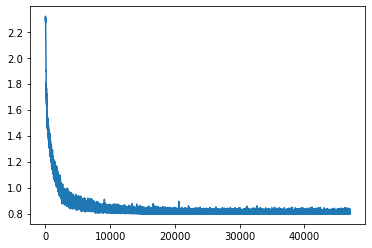

In [88]:
plt.plot(Loss)

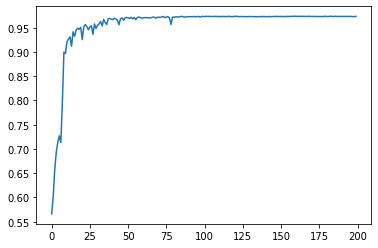

In [89]:
plt.plot(acc)

In [0]:
model = DNN(28*28, 10)

In [0]:
epochs = 70
lr = 0.1
Loss = []
acc = []

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [126]:
for epoch in range(epochs):
  
  for x, y in train_dl:
#     print(x.shape)
    
    yhat = model.forward(x.view(-1, 28*28))
    
    loss = criterion(yhat, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    Loss.append(loss.item())
    
  # count test accuracy
  count = 0
  for x, y in test_dl:
    pred = model.forward(x.view(-1, 28*28))
    _, yhat = torch.max(pred.data, 1)
    
    count += (y==yhat).sum().item()
  acc.append(count/len(test))
  
  if epoch%(epochs//5)==0:
    print(f'Loss = {Loss[-1]}  |   test_acc = {acc[-1]}')

Loss = 2.3047420978546143  |   test_acc = 0.1471
Loss = 0.64643794298172  |   test_acc = 0.8205
Loss = 0.7202309966087341  |   test_acc = 0.7666
Loss = 1.4631901979446411  |   test_acc = 0.4884
Loss = 1.319214105606079  |   test_acc = 0.4889


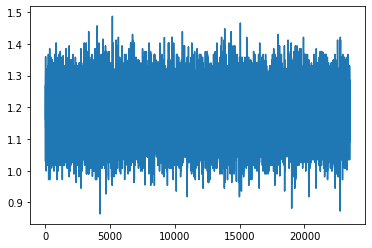

In [118]:
plt.plot(Loss)

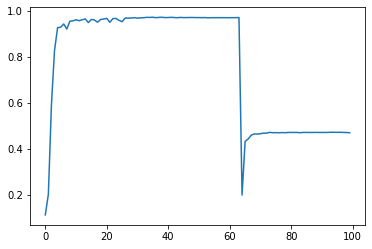

In [114]:
plt.plot(acc)

#### Module List

In [0]:
class DNN(nn.Module):
  
  def __init__(self, layers):
    
    super(DNN, self).__init__()
    
    self.hidden = nn.ModuleList()
    
    for inp, out in zip(layers, layers[1:]):
      self.hidden.append(nn.Linear(in_features=inp, out_features=out))
      
    
  def forward(self, activation):
    L = len(self.hidden)
    
    for (l, linear_transform) in zip(range(L), self.hidden):
      if l < L - 1:
        activation = F.relu(linear_transform(activation))
      else:
        activation = linear_transform(activation)
    
    return  activation
    

In [0]:
model = DNN([784, 512, 256, 128, 64, 32, 16, 10])

In [0]:
for x, y in train_dl:
  break

In [46]:
model.forward(x[0].view(-1, 28*28))

tensor([[ 0.1928, -0.2078,  0.1334,  0.1451,  0.1738, -0.2429, -0.2885,  0.1805,
          0.0992,  0.1723]], grad_fn=<AddmmBackward>)

In [47]:
print(model)

DNN(
  (hidden): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=16, bias=True)
    (6): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [0]:
epochs = 100
lr = 0.05
Loss = []
acc = []

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [59]:
for epoch in range(epochs):
  
  for x, y in train_dl:
#     print(x.shape)
    
    yhat = model.forward(x.view(-1, 28*28))
    
    loss = criterion(yhat, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    Loss.append(loss.item())
    
  # count test accuracy
  count = 0
  for x, y in test_dl:
    pred = model.forward(x.view(-1, 28*28))
    _, yhat = torch.max(pred.data, 1)
    
    count += (y==yhat).sum().item()
  acc.append(count/len(test))
  
  if epoch%(epochs//5)==0:
    print(f'Loss = {Loss[-1]}  |   test_acc = {acc[-1]}')

Loss = 0.00013337763084564358  |   test_acc = 0.9682
Loss = 5.54227881366387e-05  |   test_acc = 0.9684
Loss = 2.9748274755547754e-05  |   test_acc = 0.9682
Loss = 3.5806380765279755e-05  |   test_acc = 0.9682
Loss = 1.3135325389157515e-05  |   test_acc = 0.968


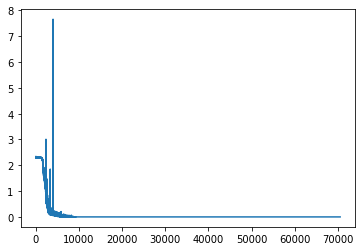

In [60]:
plt.plot(Loss)

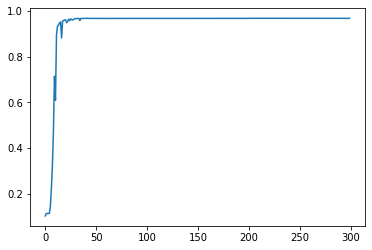

In [61]:
plt.plot(acc)